Nome: Luara do Val Perilli \
Matrícula: 2022004841

Nome: André Garcia Lopes \
Matrícula: 2019012663

## <center>***Tendências e Desafios para a Equidade na Educação Brasileira***</center>



### 1. Introdução
 
Este relatório foi elaborado com base no conteúdo fornecido durante a disciplina de Métodos Matemáticos Para Análise de Dados e segue as cinco etapas propostas do método DCOVA: **D**efinição, **C**oleta de dados, **O**rganização, **V**isualização e **A**nálise. A análise de dados desempenha um papel crucial na compreensão dos fenômenos complexos e na tomada de decisões informadas. Nesse contexto, o estudo se concentra na análise de matrículas escolares, gênero, etnia e acessibilidade nas escolas, a fim de obter conclusões significativas para a geração de políticas mais inclusivas e contribuição para um sistema educacional mais equitativo.

Ao longo deste relatório, serão abordadas as etapas metodológicas do DCOVA, desde a definição do tema até a análise dos resultados. Este estudo visa aprofundar a compreensão das complexas interações entre matrículas escolares, diversidade demográfica e acessibilidade nas escolas, destacando a importância de um sistema educacional que atenda às necessidades de todos os alunos, independentemente de suas características individuais.





### 2. Definição e Coleta dos Dados

Nesta seção, o presente relatório se dedica à análise de um microcenso abordando a educação básica no Brasil no ano de 2022. O foco da análise abrange matrículas escolares, gênero, etnia e acessibilidade nas instituições de ensino. Vale ressaltar que os dados analisados foram coletados diretamente do site do Instituto Brasileiro de Geografia e Estatística (IBGE), reconhecido por sua confiabilidade e abrangência na compilação de informações estatísticas.

Dada a extensão do sistema educacional brasileiro, uma abordagem amostral foi adotada para viabilizar a análise, considerando que um estudo abrangente de todas as escolas seria impraticável em termos de recursos. A amostra selecionada proporciona uma visão abrangente e representativa da educação básica no país durante o ano de 2022.

As variáveis analisadas podem ser classificadas em dois grupos: quantitativas e qualitativas. Variáveis quantitativas, como a quantidade de matrículas de alunas (QT_MAT_BAS_FEM) e de alunos (QT_MAT_BAS_MASC), representam valores numéricos. Já variáveis qualitativas, como aquelas relacionadas à etnia, indicam a presença ou ausência de recursos e características específicas nas escolas.

### 3. Organização dos Dados

Os dados utilizados neste estudo foram extraídos diretamente do banco de dados do Instituto Brasileiro de Geografia e Estatística (IBGE), abrangendo apenas os campos diretamente relevantes para a análise relacionada à diversidade nas escolas. Essa abordagem visa otimizar a precisão e a pertinência dos dados coletados.

Como parte do processo de preparação dos dados, foi realizada uma minuciosa limpeza do banco de dados para identificar e tratar valores ausentes. Isso garantiu que não houvesse lacunas nos campos de dados que pudessem comprometer a integridade da análise. Além disso, foram implementadas verificações para garantir a consistência dos dados, identificando possíveis discrepâncias ou erros na coleta. Essas medidas asseguraram a confiabilidade e a representatividade dos dados, fundamentais para a precisão da análise subsequente.

### 4. Apresentação dos Dados



In [66]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [67]:
# Carregar os dados do arquivo CSV
dados = pd.read_csv("dados.csv")
dados

,CO_REGIAO,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE
0,1,2,4,0,0,0,0,6,0,0,0,0,0,0,0,1
1,1,114,86,53,5,132,0,10,1,0,0,0,1,1,1,0
2,1,4,5,3,0,6,0,0,0,0,0,0,0,0,0,1
3,1,53,65,15,6,62,0,22,0,0,0,0,0,0,0,1
4,1,76,85,59,2,91,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178341,5,82,64,47,2,83,0,0,0,1,1,1,1,1,1,0
178342,5,199,207,28,1,179,0,0,0,0,0,1,1,0,0,0
178343,5,194,199,151,12,138,4,1,0,0,1,1,0,0,0,0
178344,5,226,248,186,6,98,2,0,0,0,0,1,1,0,0,0


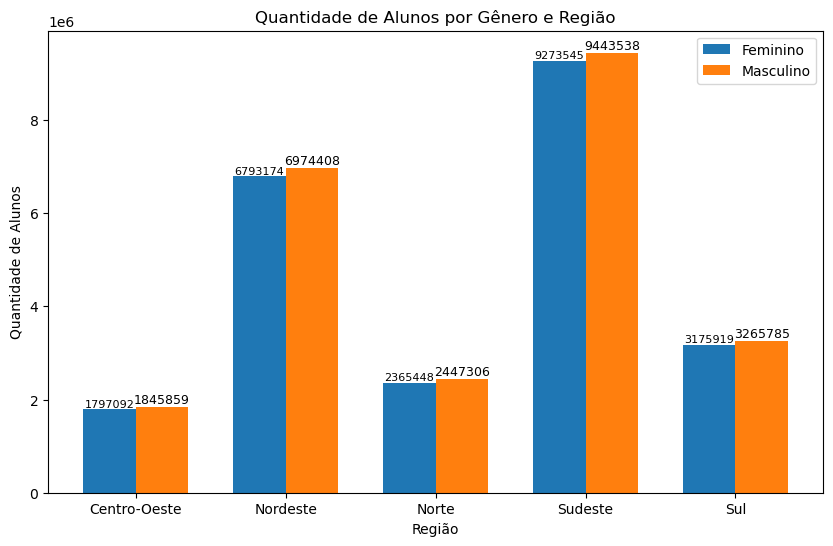

In [68]:
# Mapear os códigos da região para os nomes
regioes = {
    1: "Norte",
    2: "Nordeste",
    3: "Sudeste",
    4: "Sul",
    5: "Centro-Oeste"
}

# Adicionar uma coluna 'Região' ao DataFrame com os nomes das regiões
dados['Região'] = dados['CO_REGIAO'].map(regioes)

# Calcular a quantidade total de alunos por região para cada gênero
alunos_por_genero = dados.groupby('Região')[['QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC']].sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Largura das barras

# Posições no eixo x para cada região
posicoes = range(len(alunos_por_genero.index))

# Criar as barras de alunos femininos
plt.bar(posicoes, alunos_por_genero['QT_MAT_BAS_FEM'], bar_width, label='Feminino')

# Criar as barras de alunos masculinos ao lado das barras femininas
plt.bar([p + bar_width for p in posicoes], alunos_por_genero['QT_MAT_BAS_MASC'], bar_width, label='Masculino')

# Adicionar rótulos numéricos em cima de cada barra
for i, (fem, masc) in enumerate(zip(alunos_por_genero['QT_MAT_BAS_FEM'], alunos_por_genero['QT_MAT_BAS_MASC'])):
    plt.text(i, fem, str(fem), ha='center', va='bottom', fontsize=8)
    plt.text(i + bar_width, masc, str(masc), ha='center', va='bottom', fontsize=9)

# Definir rótulos e título do gráfico
plt.xlabel('Região')
plt.ylabel('Quantidade de Alunos')
plt.title('Quantidade de Alunos por Gênero e Região')
plt.xticks([p + bar_width / 2 for p in posicoes], alunos_por_genero.index)  # Colocar rótulos no meio das barras
plt.legend()
plt.show()

A análise dos dados da quantidade de alunos por gênero e região nas escolas brasileiras revela uma série de tendências e padrões interessantes. A região Sudeste, que compreende estados economicamente desenvolvidos, apresenta a maior quantidade de alunos, tanto do sexo feminino quanto do masculino. No entanto, é notável que a região Sudeste possui um número ligeiramente maior de alunos do sexo masculino (9.443.538) em comparação com as alunas (9.273.545).

A região Nordeste, que é a segunda maior em termos populacionais, também apresenta uma predominância de alunos do sexo masculino (6.974.408) em relação às alunas (6.793.174). A região Sul, embora com números menores em comparação com as duas primeiras, também exibe uma predominância de alunos do sexo masculino (3.265.785) em relação às alunas (3.175.919).

Por outro lado, as regiões Norte e Centro-Oeste apresentam uma situação relativamente mais equilibrada em termos de distribuição de gênero. No entanto, ainda existe uma ligeira predominância de alunos do sexo masculino nessas regiões.

Esses números refletem possíveis disparidades na educação entre gêneros nas diferentes regiões do Brasil. Embora haja variações regionais, a predominância de alunos do sexo masculino em várias regiões sugere que a equidade de gênero pode ser uma preocupação em todo o país. Essas disparidades podem ser influenciadas por uma série de fatores, incluindo normas culturais, acessibilidade à educação e oportunidades econômicas.

Para promover uma educação mais equitativa, é fundamental que políticas e estratégias sejam desenvolvidas para abordar essas diferenças de gênero, garantindo igualdade de oportunidades educacionais para todos os alunos, independentemente do sexo e da região em que vivem.

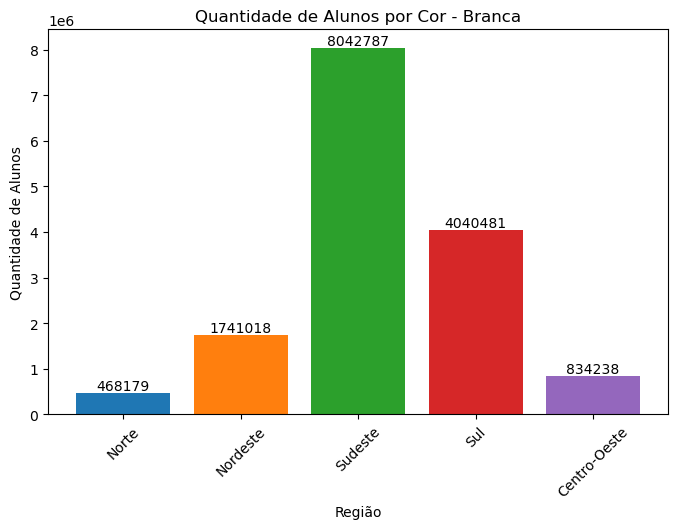

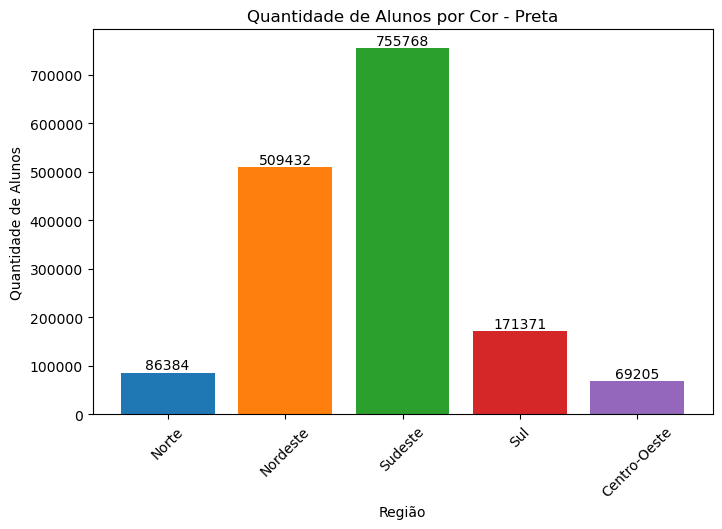

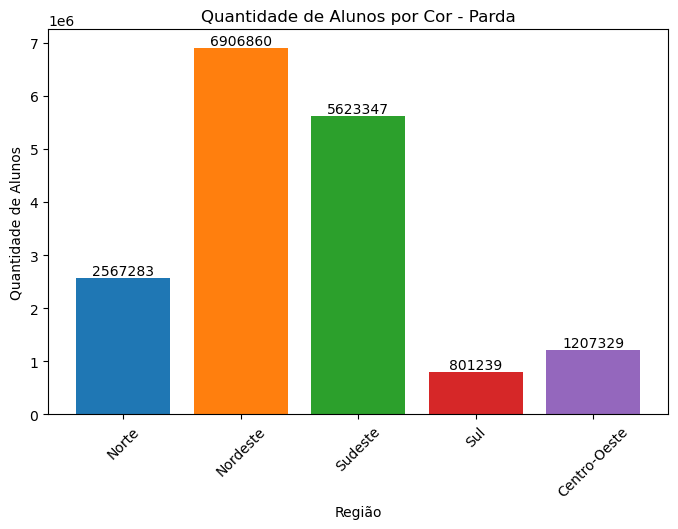

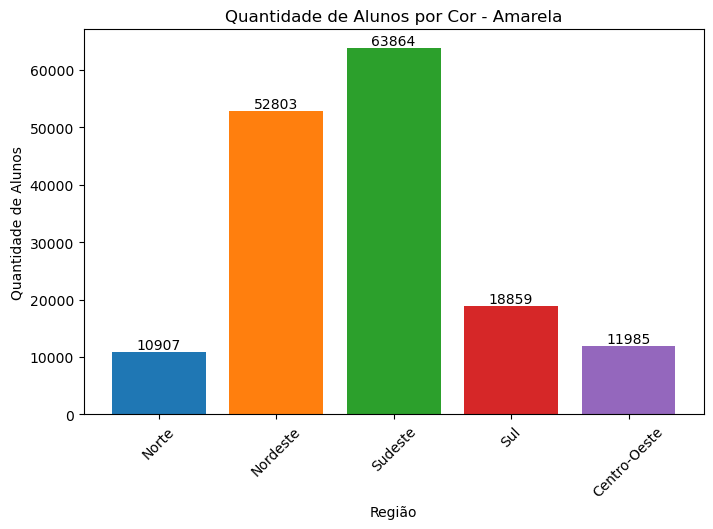

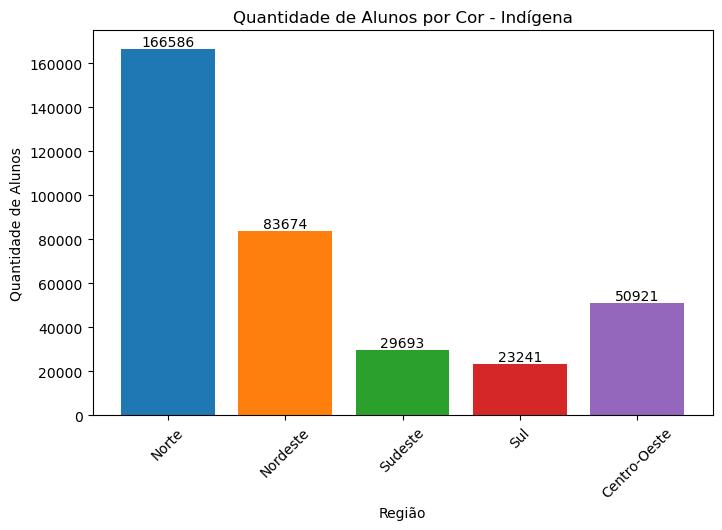

In [69]:
# Lista das cores
cores = ['QT_MAT_BAS_BRANCA', 'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT_BAS_INDIGENA']
nomes = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
# Criar gráficos para cada cor
for cor in cores:
    plt.figure(figsize=(8, 5))
    for regiao in regioes.values():
        dados_regiao = dados[dados['Região'] == regiao]
        total_alunos_por_cor = dados_regiao[cor].sum()
        plt.bar(regiao, total_alunos_por_cor)
        plt.text(regiao, total_alunos_por_cor, str(total_alunos_por_cor), ha='center', va='bottom', fontsize=10)

    # Definir rótulos e título do gráfico
    plt.xlabel('Região')
    plt.ylabel('Quantidade de Alunos')
    plt.title(f'Quantidade de Alunos por Cor - {nomes[cores.index(cor)]}')
    plt.xticks(rotation=45)
    plt.show()


A análise dos dados sobre a quantidade de alunos por cor revela uma complexa paisagem socioeducacional no Brasil, refletindo as diversidades culturais e sociais presentes em diferentes regiões do país. Observa-se que na região Sudeste, que abriga os estados mais desenvolvidos economicamente como São Paulo e Rio de Janeiro, há uma grande quantidade de alunos autodeclarados como brancos. Este padrão pode ser associado às disparidades históricas de acesso à educação, indicando uma possível falta de inclusão em outras etnias. Por outro lado, as regiões Norte e Nordeste, que enfrentam desafios socioeconômicos significativos, exibem uma maior diversidade racial em suas populações estudantis, sendo marcadas pela presença expressiva de alunos pardos, pretos e indígenas. Estes números evidenciam a necessidade urgente de políticas educacionais inclusivas que valorizem e respeitem a diversidade racial e cultural do Brasil.

Além disso, é crucial observar as discrepâncias regionais na distribuição dos alunos por cor. A região Nordeste, por exemplo, destaca-se pelo elevado número de alunos pardos, o que pode estar relacionado à preservação de tradições e culturas locais em meio às condições socioeconômicas desfavoráveis. No entanto, a representatividade de alunos indígenas é notavelmente maior na região Norte, ressaltando a importância de estratégias educacionais específicas para comunidades tradicionais. A região Sul, apesar de ter uma quantidade significativa de alunos brancos, também apresenta uma população estudantil considerável de alunos pardos, indicando uma maior mistura racial e étnica nesta área. Essa diversidade, ainda que regionalmente variável, destaca a necessidade de políticas educacionais sensíveis à cultura, que promovam a igualdade e a valorização das diferentes identidades étnicas no contexto escolar.

Esses dados também ilustram desafios contínuos em termos de equidade educacional e oportunidades para alunos de diferentes origens étnicas. É fundamental que as políticas educacionais se concentrem não apenas na expansão do acesso à educação, mas também na qualidade do ensino e na promoção de ambientes escolares inclusivos, que respeitem e celebrem a diversidade cultural e racial do Brasil. Investimentos em formação de professores, currículos culturalmente sensíveis e programas que reduzam as disparidades sociais são essenciais para criar um sistema educacional verdadeiramente igualitário e inclusivo em todo o país.

<Figure size 1200x800 with 0 Axes>

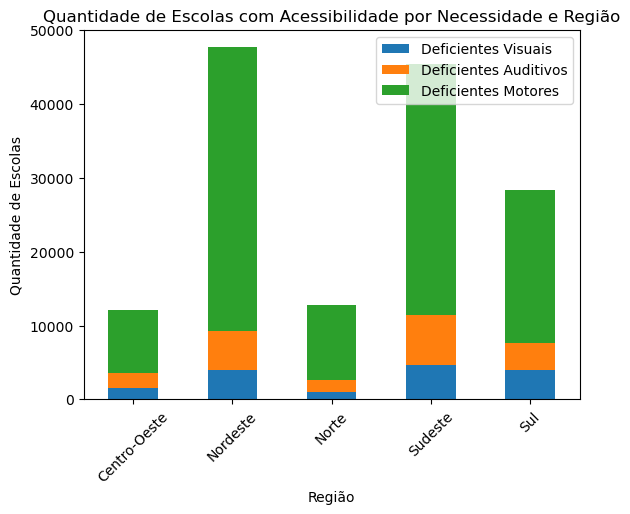

In [70]:
# Selecionar as colunas relevantes para acessibilidade
colunas_acessibilidade = ['IN_ACESSIBILIDADE_SINAL_VISUAL', 
                          'IN_ACESSIBILIDADE_SINAL_TATIL', 
                          'IN_ACESSIBILIDADE_PISOS_TATEIS', 
                          'IN_ACESSIBILIDADE_ELEVADOR', 
                          'IN_ACESSIBILIDADE_RAMPAS', 
                          'IN_ACESSIBILIDADE_VAO_LIVRE']

# Criar coluna indicando se pelo menos um dos critérios de acessibilidade está presente
dados['Acessibilidade_Surdos'] = dados['IN_ACESSIBILIDADE_SINAL_VISUAL']
dados['Acessibilidade_Cegos'] = dados['IN_ACESSIBILIDADE_SINAL_TATIL'] | dados['IN_ACESSIBILIDADE_PISOS_TATEIS']
dados['Acessibilidade_Deficientes'] = dados['IN_ACESSIBILIDADE_RAMPAS'] | dados['IN_ACESSIBILIDADE_VAO_LIVRE'] | dados['IN_ACESSIBILIDADE_ELEVADOR']

# Contar a quantidade de escolas com e sem acessibilidade para cada necessidade
escolas_acessibilidade = dados.groupby('Região')[['Acessibilidade_Surdos', 'Acessibilidade_Cegos', 'Acessibilidade_Deficientes']].sum()

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
escolas_acessibilidade.plot(kind='bar', stacked=True)
plt.title('Quantidade de Escolas com Acessibilidade por Necessidade e Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Escolas')
plt.xticks(rotation=45)
plt.legend(['Deficientes Visuais', 'Deficientes Auditivos', 'Deficientes Motores'])
plt.show()


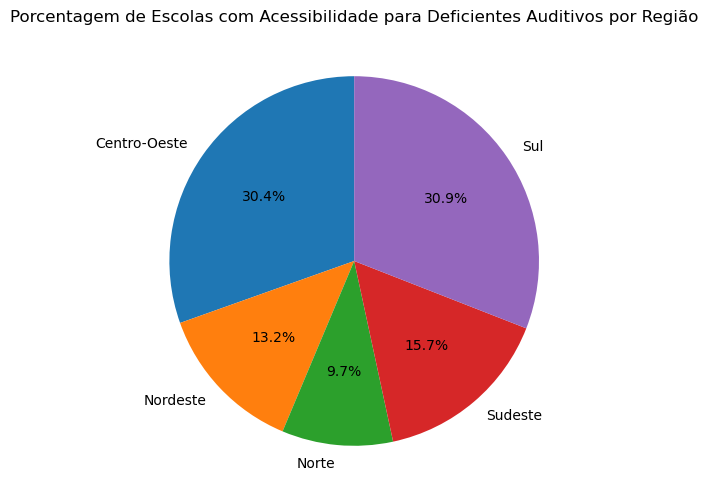

In [71]:
# Calcular a porcentagem de escolas com acessibilidade para surdos por região
porcentagem_acessibilidade_surdos = (dados.groupby('Região')['IN_ACESSIBILIDADE_SINAL_VISUAL'].sum() / dados.groupby('Região')['IN_ACESSIBILIDADE_SINAL_VISUAL'].count()) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(porcentagem_acessibilidade_surdos, labels=porcentagem_acessibilidade_surdos.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Escolas com Acessibilidade para Deficientes Auditivos por Região')
plt.show()

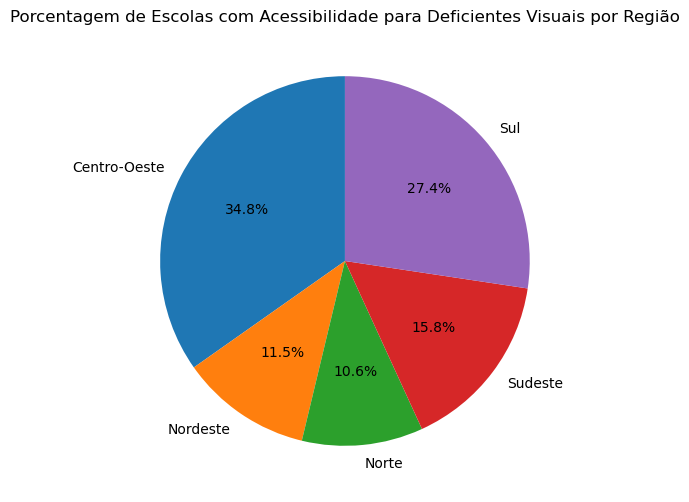

In [72]:
# Calcular a porcentagem de escolas com acessibilidade para cegos por região
porcentagem_acessibilidade_cegos = (dados.groupby('Região')['IN_ACESSIBILIDADE_SINAL_TATIL'].sum() / dados.groupby('Região')['IN_ACESSIBILIDADE_SINAL_TATIL'].count()) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(porcentagem_acessibilidade_cegos, labels=porcentagem_acessibilidade_cegos.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Escolas com Acessibilidade para Deficientes Visuais por Região')
plt.show()

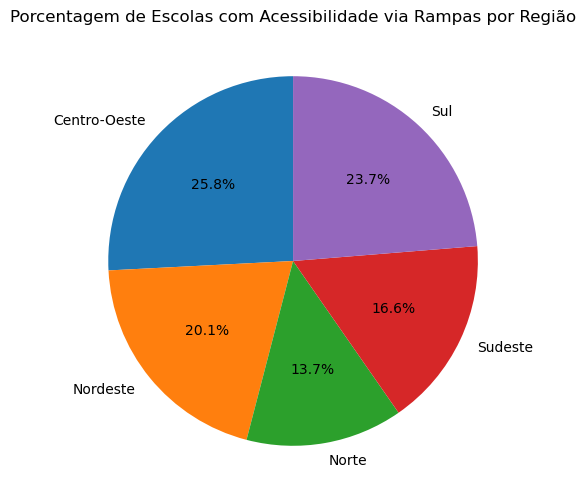

In [73]:
# Calcular a porcentagem de escolas com acessibilidade via rampas por região
porcentagem_acessibilidade_rampas = (dados.groupby('Região')['IN_ACESSIBILIDADE_RAMPAS'].sum() / dados.groupby('Região')['IN_ACESSIBILIDADE_RAMPAS'].count()) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(porcentagem_acessibilidade_rampas, labels=porcentagem_acessibilidade_rampas.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Escolas com Acessibilidade via Rampas por Região')
plt.show()

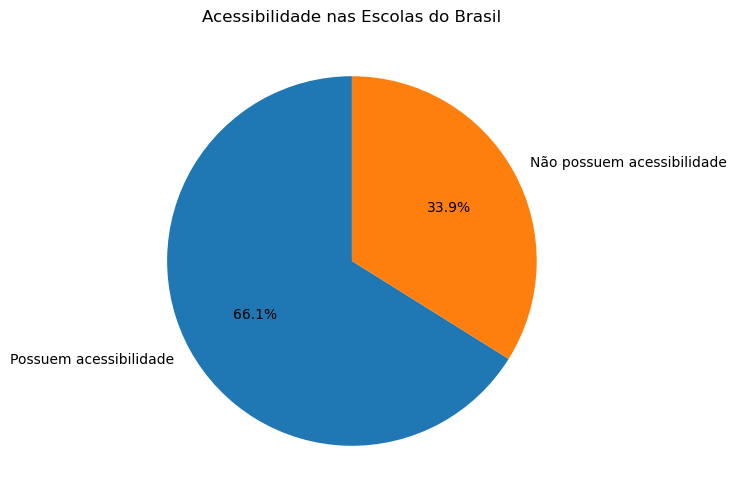

In [74]:
# Calcular a contagem de escolas com e sem acessibilidade
escolas_com_acessibilidade = dados[dados['IN_ACESSIBILIDADE_INEXISTENTE'] == 0].shape[0]
escolas_sem_acessibilidade = dados[dados['IN_ACESSIBILIDADE_INEXISTENTE'] == 1].shape[0]

# Dados para o gráfico de pizza
dados_acessibilidade = [escolas_com_acessibilidade, escolas_sem_acessibilidade]
labels = ['Possuem acessibilidade', 'Não possuem acessibilidade']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(dados_acessibilidade, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Acessibilidade nas Escolas do Brasil')
plt.show()

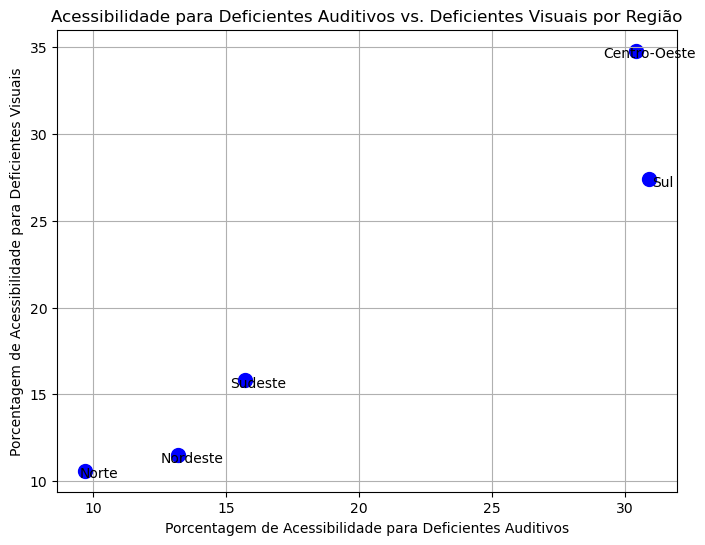

In [75]:
regioes = ['Centro-Oeste', 'Sul', 'Sudeste', 'Nordeste', 'Norte']
porcentagens_auditivos = [30.4, 30.9, 15.7, 13.2, 9.7]
porcentagens_visuais = [34.8, 27.4, 15.8, 11.5, 10.6]

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(porcentagens_auditivos, porcentagens_visuais, color='b', s=100)  # s é o tamanho dos pontos no gráfico
plt.xlabel('Porcentagem de Acessibilidade para Deficientes Auditivos')
plt.ylabel('Porcentagem de Acessibilidade para Deficientes Visuais')
plt.title('Acessibilidade para Deficientes Auditivos vs. Deficientes Visuais por Região')
plt.grid(True)

# Adicionar etiquetas para as regiões
for i, regiao in enumerate(regioes):
    plt.annotate(regiao, (porcentagens_auditivos[i], porcentagens_visuais[i]), textcoords="offset points", xytext=(10,-5), ha='center')

plt.show()

Acessibilidade para Deficientes Auditivos:
A região Centro-Oeste e Sul apresentam as maiores taxas de acessibilidade para deficientes auditivos, com 30,4% e 30,9% respectivamente. Esse fenômeno pode ser atribuído a uma maior conscientização sobre a inclusão e possivelmente a políticas públicas estaduais mais eficientes. Em contraste, o Norte e Nordeste têm as porcentagens mais baixas (9,7% e 13,2% respectivamente), indicando uma necessidade urgente de investimentos em infraestrutura e programas de conscientização nessas áreas.

Acessibilidade para Deficientes Visuais:
Novamente, o Centro-Oeste lidera em acessibilidade para deficientes visuais, com uma taxa de 34,8%. Isso pode refletir o resultado de uma cultura inclusiva e esforços contínuos para melhorar a acessibilidade. No entanto, as regiões Sul, Sudeste, Norte e Nordeste mostram números consideravelmente mais baixos, indicando desafios significativos nesses locais.

Acessibilidade Via Rampas:
A acessibilidade via rampas, fundamental para pessoas com deficiência motora, varia consideravelmente entre as regiões. O Centro-Oeste novamente lidera com 25,8%, seguido pelo Nordeste com 20,1%. O Sul e Sudeste estão próximos, com 23,7% e 16,6% respectivamente, enquanto o Norte fica atrás com 13,7%. Isso sugere uma falta de infraestrutura adequada em todo o país, com uma necessidade particular de melhorias nas regiões Norte e Nordeste.

A análise nacional revela que cerca de 66,1% das escolas têm alguma forma de acessibilidade, enquanto 33,9% não possuem. Embora a maioria das escolas tenha algum nível de acessibilidade, a qualidade e a abrangência dessas instalações variam amplamente. É vital reconhecer que garantir acessibilidade não é apenas uma questão de infraestrutura, mas também de conscientização e educação. Intervenções culturais e educacionais são cruciais para criar um ambiente verdadeiramente inclusivo em todas as regiões do Brasil.

A análise dos dados ressalta a necessidade de políticas públicas que promovam a inclusão e a acessibilidade em todo o país. É essencial investir não apenas em infraestrutura, mas também em programas educacionais e campanhas de conscientização para criar uma sociedade mais inclusiva. Além disso, a compreensão das disparidades regionais pode orientar a distribuição eficaz de recursos, garantindo que as áreas mais necessitadas recebam apoio adequado para melhorar a acessibilidade e promover a igualdade de oportunidades para todos os estudantes brasileiros.

### 5. Análise dos Resultados


A análise dos dados revela desafios significativos relacionados à equidade na educação no Brasil, com foco em gênero, cor/raça e acessibilidade. Em relação ao gênero, os gráficos apontam uma desigualdade persistente, com uma proporção maior de alunos do sexo masculino em todas as regiões do país. Essa disparidade sugere que as meninas podem estar enfrentando obstáculos para obter uma educação equitativa, devido a fatores como discriminação de gênero, falta de oportunidades e exposição à violência de gênero.

Para abordar essa questão, políticas de igualdade de gênero são essenciais, juntamente com a formação de professores para reconhecer e combater a discriminação de gênero em sala de aula. A conscientização e a educação sexual desempenham um papel vital na preparação dos alunos para lidar com desafios de gênero, enquanto o apoio psicossocial ajuda as vítimas de discriminação de gênero. O envolvimento ativo dos pais na promoção da igualdade de gênero também é fundamental.

Quanto à disparidade racial na educação, alunos pretos, pardos e indígenas representam uma proporção maior nas regiões economicamente desfavorecidas. A colonização, a escravidão e a miscigenação influenciaram profundamente essa desigualdade. Para enfrentar esse problema, políticas de ação afirmativa são necessárias, juntamente com investimentos em educação pública de qualidade nas regiões menos desenvolvidas. O combate ao racismo e à discriminação racial nas escolas também é crucial.

Por fim, a acessibilidade nas escolas brasileiras é inadequada, com a maioria das escolas não oferecendo recursos para alunos com deficiência. Para melhorar a acessibilidade, é fundamental investir em infraestrutura, como rampas e pisos táteis, além de fornecer formação adequada aos professores. O uso de recursos tecnológicos, como intérpretes de Libras e sistemas de voz, também é essencial. Garantir a igualdade de acesso regional à acessibilidade é uma prioridade.

Em resumo, a promoção da equidade na educação no Brasil requer a implementação de políticas abrangentes e investimentos em infraestrutura e formação de professores. A conscientização e a igualdade são essenciais para garantir que todos os alunos tenham acesso a uma educação inclusiva e de qualidade, independentemente de seu gênero, cor/raça ou deficiência, contribuindo para um sistema educacional mais justo e igualitário.

### 6. Referências

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar